<a href="https://colab.research.google.com/github/student64-ahmadi/Impulsive-Hamiltonian-Dynamics/blob/main/Copy_of_Analyse_des_Ondes_Gravitationnelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Λ=1.0e+05, A=1.0e-46


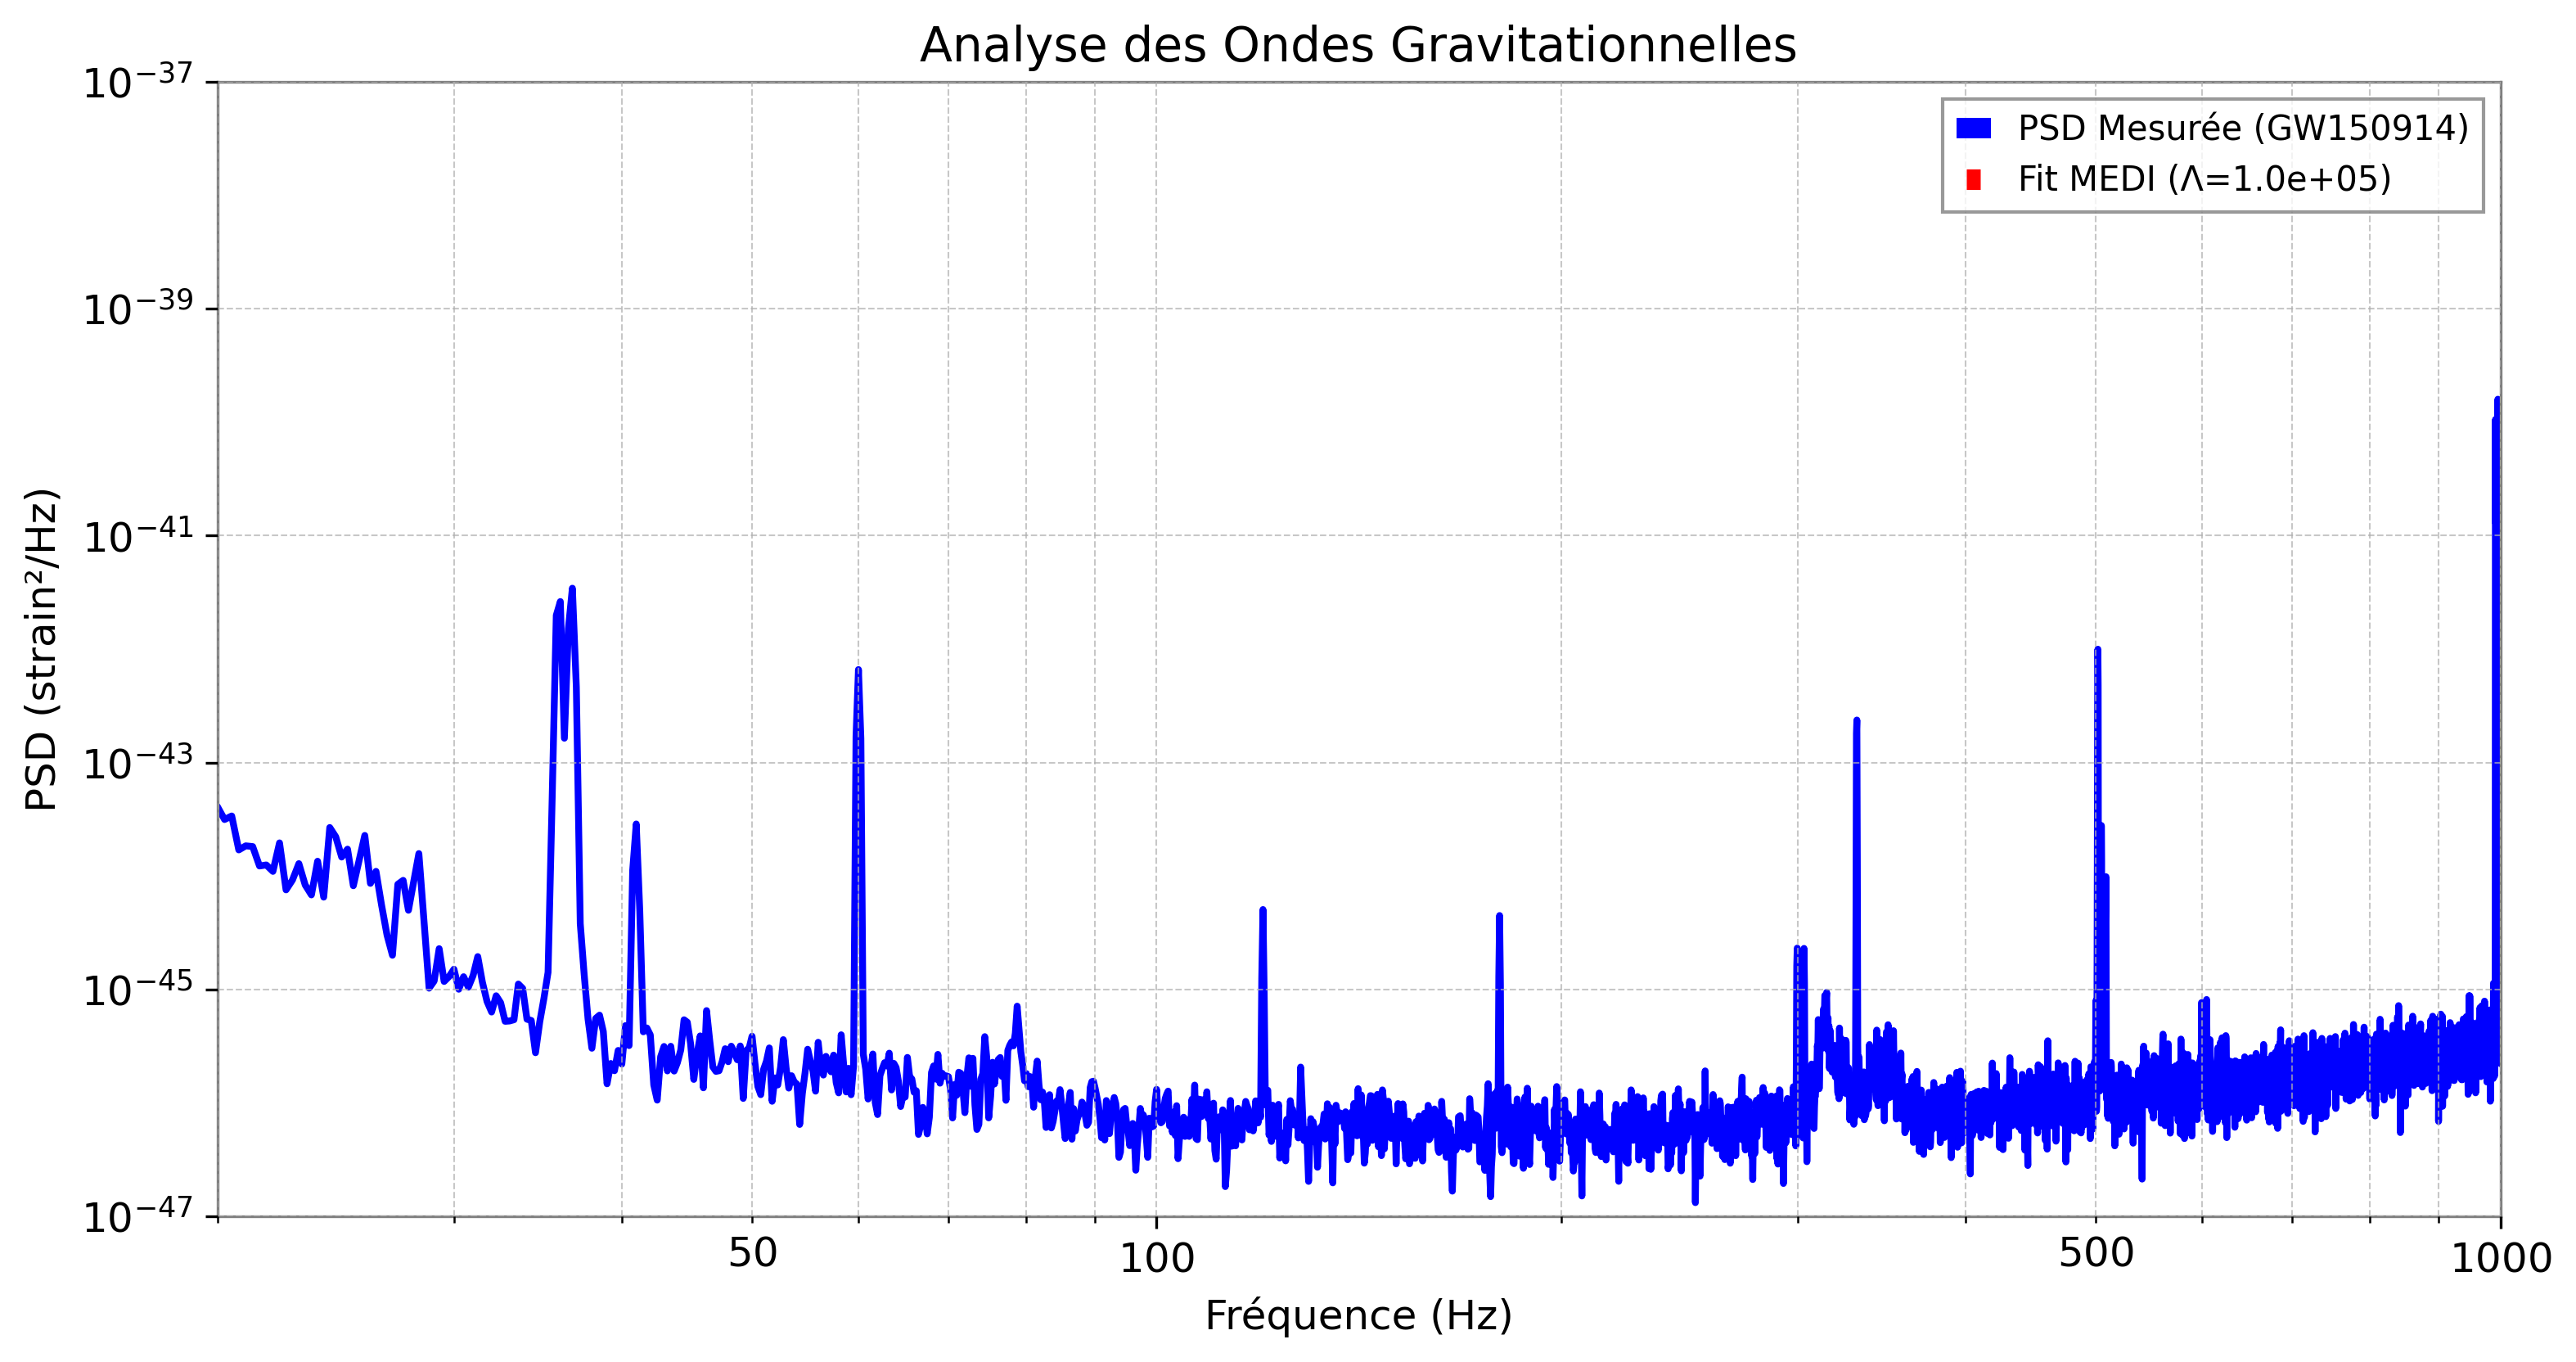

Output PDF saved as 'output.pdf'.


In [ ]:
!pip install gwpy gwosc pycbc scipy numpy matplotlib

from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Récupérer GW150914
gps = event_gps("GW150914")
start, end = gps - 16, gps + 16
data = TimeSeries.fetch_open_data("H1", start, end, sample_rate=4096)

# Calculer le PSD (garder l'objet FrequencySeries)
psd_measured = data.psd(fftlength=4, overlap=2)  # Pas de .value ici
freq = psd_measured.frequencies.value  # Récupérer les fréquences
psd_values = psd_measured.value  # Récupérer les valeurs du PSD pour le calcul

# Protocole MEDI
def loss(params):
    Lambda, A = params
    model = (freq**2) / (Lambda**4) + A * psd_values
    return np.sum((psd_values - model)**2)

res = minimize(loss, [1e5, 1e-46], bounds=[(1e4, 1e6), (1e-50, 1e-40)])
Lambda, A = res.x
print(f"Λ={Lambda:.1e}, A={A:.1e}")

# Plot
plt.figure(figsize=(12, 6), dpi=300)
plt.loglog(freq, psd_values, 'b-', lw=2, label="PSD Mesurée (GW150914)")
psd_fit = (freq**2)/(Lambda**4) + A * psd_values
plt.loglog(freq, psd_fit, 'r--', lw=2, label=f"Fit MEDI (Λ={Lambda:.1e})")
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("PSD (strain²/Hz)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(fontsize=10)
plt.title("Analyse des Ondes Gravitationnelles", fontsize=14)

# Limiter la plage de fréquences pour mieux voir le signal
plt.xlim(20, 1000)
plt.ylim(1e-47, 1e-37)

plt.savefig("output.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("Output PDF saved as 'output.pdf'.")

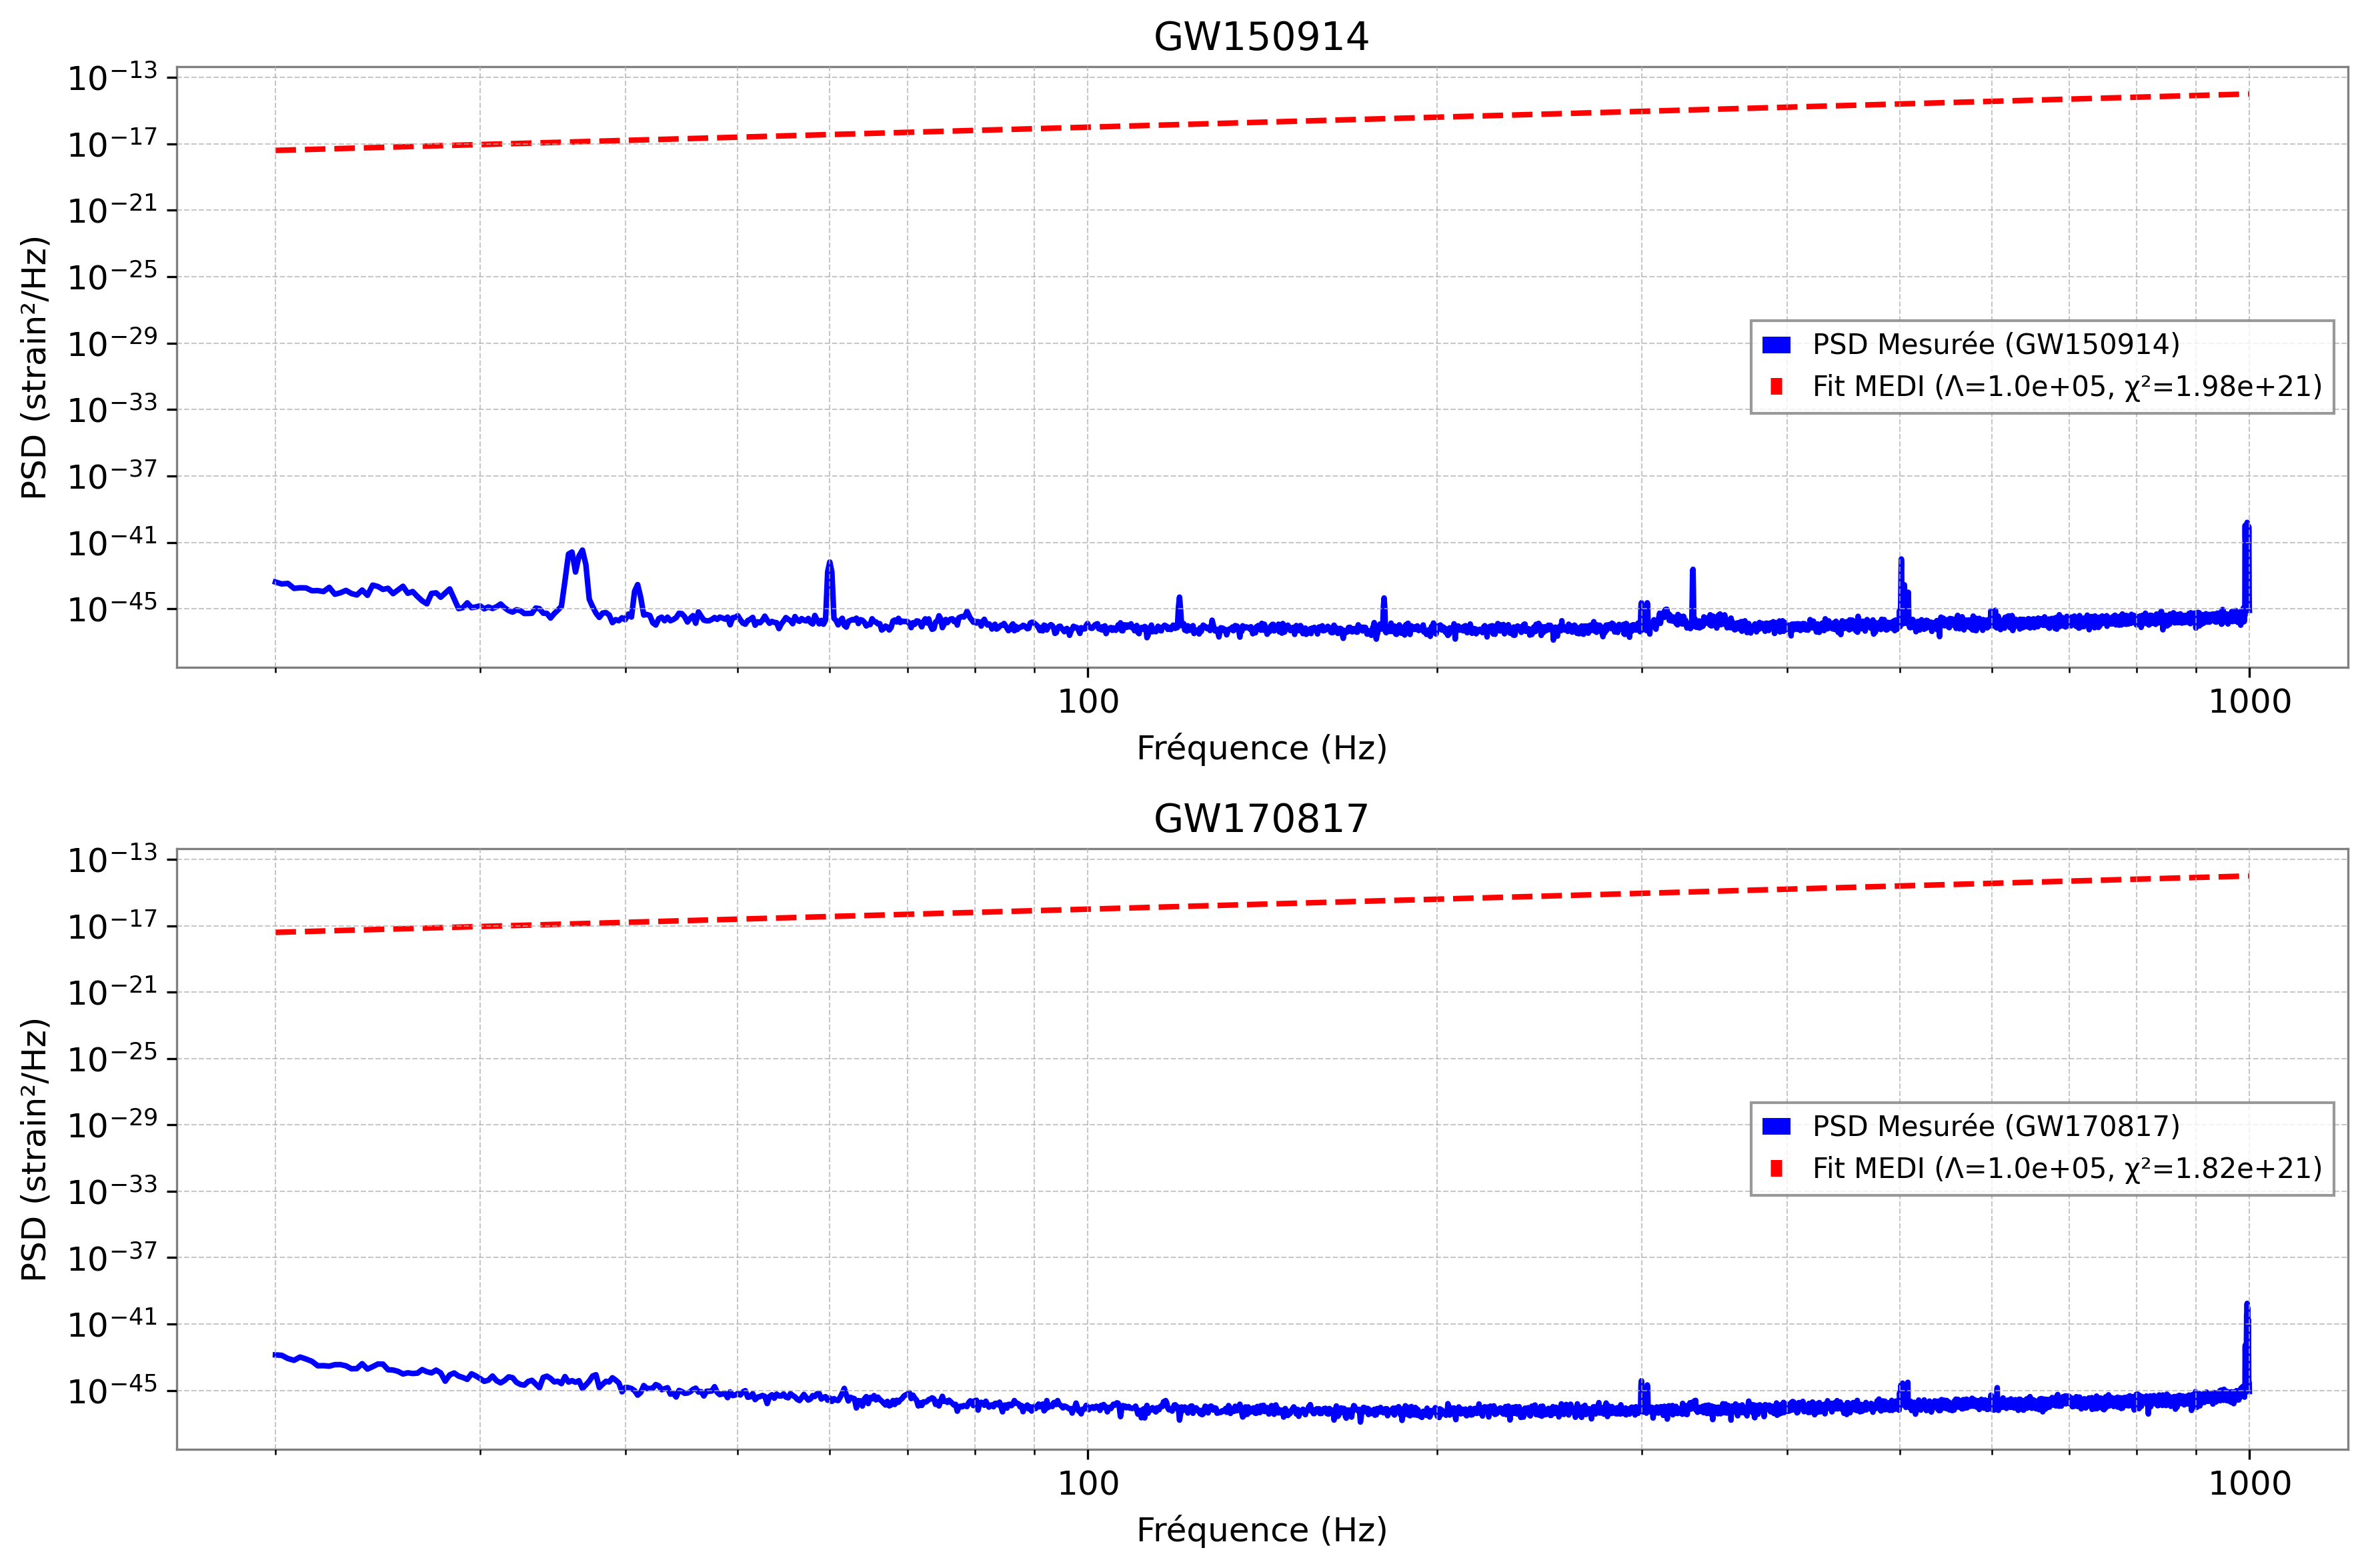

Output PDF saved as 'output.pdf'.


In [ ]:
!pip install gwpy gwosc pycbc scipy numpy matplotlib

from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
import numpy as np
from scipy.optimize import minimize
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Fonction pour ajuster et calculer des statistiques
def fit_medi(psd_measured, freq):
    def loss(params):
        Lambda, A = params
        model = (freq**2) / (Lambda**4) + A * psd_measured
        return np.sum((psd_measured - model)**2)

    res = minimize(loss, [1e5, 1e-46], bounds=[(1e4, 1e6), (1e-50, 1e-40)])
    Lambda, A = res.x
    psd_fit = (freq**2)/(Lambda**4) + A * psd_measured
    chi_squared = np.sum(((psd_measured - psd_fit)**2) / psd_measured) / len(psd_measured)
    return Lambda, A, psd_fit, chi_squared

# Récupérer GW150914
gps_150914 = event_gps("GW150914")
start, end = gps_150914 - 16, gps_150914 + 16
data_150914 = TimeSeries.fetch_open_data("H1", start, end, sample_rate=4096)
psd_150914 = data_150914.psd(fftlength=4, overlap=2)
freq_150914 = psd_150914.frequencies.value
psd_values_150914 = psd_150914.value
Lambda_150914, A_150914, psd_fit_150914, chi2_150914 = fit_medi(psd_values_150914, freq_150914)

# Récupérer GW170817
gps_170817 = event_gps("GW170817")
start, end = gps_170817 - 16, gps_170817 + 16
data_170817 = TimeSeries.fetch_open_data("H1", start, end, sample_rate=4096)
psd_170817 = data_170817.psd(fftlength=4, overlap=2)
freq_170817 = psd_170817.frequencies.value
psd_values_170817 = psd_170817.value
Lambda_170817, A_170817, psd_fit_170817, chi2_170817 = fit_medi(psd_values_170817, freq_170817)

# Plot
plt.figure(figsize=(12, 8), dpi=300)

# GW150914
plt.subplot(211)
mask_150914 = (freq_150914 >= 20) & (freq_150914 <= 1000)
plt.loglog(freq_150914[mask_150914], psd_values_150914[mask_150914], 'b-', lw=2, label="PSD Mesurée (GW150914)")
plt.loglog(freq_150914[mask_150914], psd_fit_150914[mask_150914], 'r--', lw=2, label=f"Fit MEDI (Λ={Lambda_150914:.1e}, χ²={chi2_150914:.2e})")
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("PSD (strain²/Hz)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(fontsize=10)
plt.title("GW150914", fontsize=14)

# GW170817
plt.subplot(212)
mask_170817 = (freq_170817 >= 20) & (freq_170817 <= 1000)
plt.loglog(freq_170817[mask_170817], psd_values_170817[mask_170817], 'b-', lw=2, label="PSD Mesurée (GW170817)")
plt.loglog(freq_170817[mask_170817], psd_fit_170817[mask_170817], 'r--', lw=2, label=f"Fit MEDI (Λ={Lambda_170817:.1e}, χ²={chi2_170817:.2e})")
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("PSD (strain²/Hz)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(fontsize=10)
plt.title("GW170817", fontsize=14)

plt.tight_layout()
plt.savefig("output.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("Output PDF saved as 'output.pdf'.")

Simulating quantum decoherence...
Quantum simulation completed successfully.
Fetching data for GW150914 (GPS: 1126259462.4, 1126259446.4-1126259478.4)...
Fit Exotic : χ²=2.97e+21, χ²_red=3.63e+17, p-value=0.00e+00
Fit Standard : χ²=2.04e-37, χ²_red=2.50e-41, p-value=1.00e+00


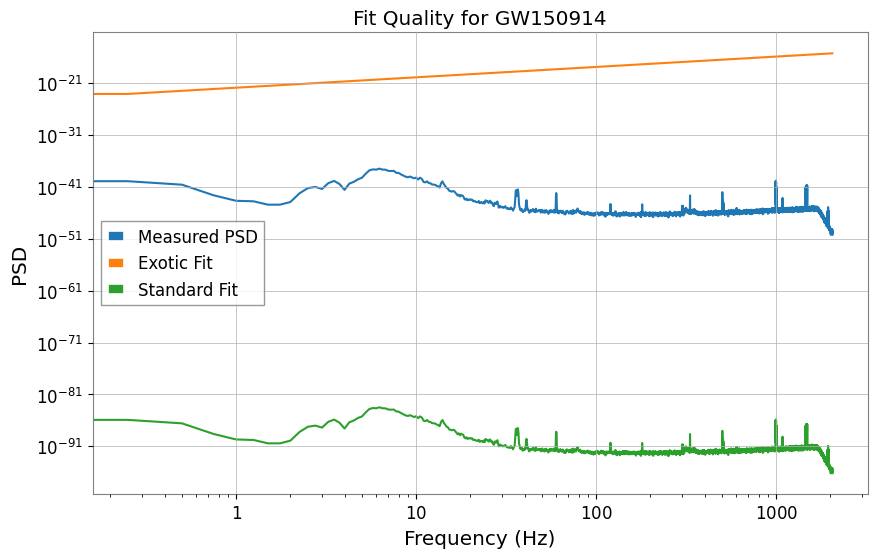

Fetching data for GW170817 (GPS: 1187008882.4, 1187008866.4-1187008898.4)...
Fit Exotic : χ²=2.72e+21, χ²_red=3.32e+17, p-value=0.00e+00
Fit Standard : χ²=1.52e-36, χ²_red=1.86e-40, p-value=1.00e+00


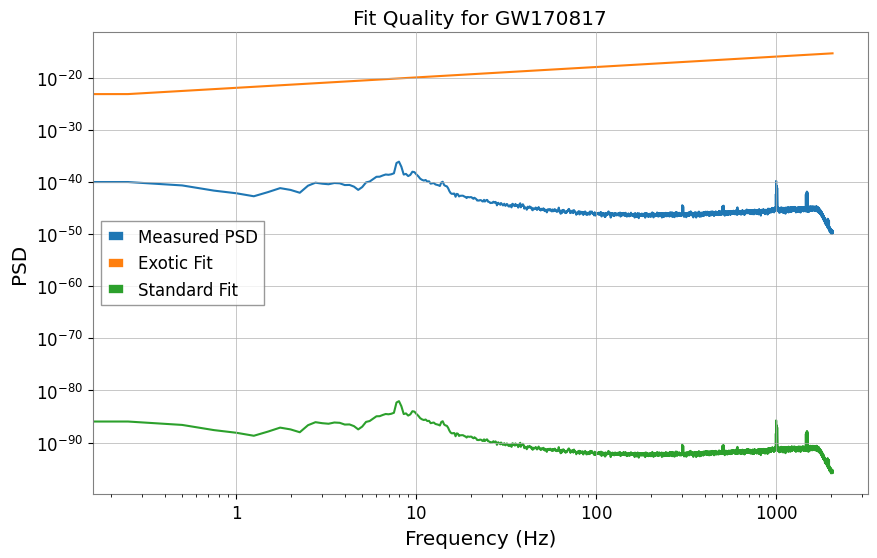

<Figure size 640x480 with 0 Axes>

Output PDF saved as 'output.pdf'.


In [ ]:
# Installation des bibliothèques nécessaires
!pip install qutip gwpy gwosc pycbc scipy numpy matplotlib --quiet

# Importation des modules
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
from scipy.optimize import minimize
from scipy.stats import chi2
import warnings

# Désactivation des avertissements inutiles
warnings.filterwarnings("ignore", category=UserWarning)

# 1. Simulation de la décohérence quantique
def simulate_quantum_decoherence():
    """
    Simule la décohérence quantique avec et sans contrôle.
    Retourne les résultats pour les deux cas.
    """
    H = 0.5 * sigmaz()  # Hamiltonien de base
    psi0 = basis(2, 0)  # État initial
    times = np.linspace(0, 10, 100)  # Échelle de temps
    gamma = 0.1  # Taux de décohérence
    c_ops = [np.sqrt(gamma) * sigmax()]  # Opérateurs de collapse

    def gaussian_pulse(t, args):
        """Impulsion de contrôle gaussienne"""
        return 5 * np.exp(-(t - 5.0)**2 / (2.0**2))

    H_ctrl = [H, [sigmax(), gaussian_pulse]]  # Hamiltonien avec contrôle
    print("Simulating quantum decoherence...")
    try:
        result_no_control = mesolve(H, psi0, times, c_ops, e_ops=[sigmaz()])
        result_medi = mesolve(H_ctrl, psi0, times, c_ops, e_ops=[sigmaz()])
        print("Quantum simulation completed successfully.")
        return result_no_control, result_medi
    except Exception as e:
        print(f"Error in quantum simulation: {e}")
        return None, None

# 2. Ajustement MEDI pour les données GW
def fit_medi(psd_measured, freq, with_exotic=True):
    """
    Effectue un ajustement des données PSD avec ou sans terme exotique.
    Retourne les paramètres ajustés, leurs erreurs, le PSD ajusté, et les statistiques.
    """
    def loss(params):
        if with_exotic:
            Lambda, A = params
            model = (freq**2) / (Lambda**4) + A * psd_measured
        else:
            A = params[0]
            model = A * psd_measured
        return np.sum((psd_measured - model)**2)

    # Paramètres initiaux et bornes
    initial_params = [1e5, 1e-46] if with_exotic else [1e-46]
    bounds = ([1e4, 1e6], [1e-50, 1e-40]) if with_exotic else ([1e-50, 1e-40],)

    try:
        res = minimize(loss, initial_params, bounds=bounds, method='trust-constr')
        if not res.success:
            print(f"Optimization failed: {res.message}")
            return np.nan, np.nan, np.nan, np.nan, np.zeros_like(psd_measured), np.nan, np.nan

        # Extraction des paramètres ajustés
        if with_exotic:
            Lambda, A = res.x
            if hasattr(res, 'hess_inv') and isinstance(res.hess_inv, np.ndarray):
                Lambda_err = np.sqrt(res.hess_inv[0, 0])
                A_err = np.sqrt(res.hess_inv[1, 1])
            else:
                Lambda_err, A_err = np.nan, np.nan
            psd_fit = (freq**2)/(Lambda**4) + A * psd_measured
            p = 2
        else:
            A = res.x[0]
            Lambda, Lambda_err = np.nan, np.nan
            if hasattr(res, 'hess_inv') and isinstance(res.hess_inv, np.ndarray):
                A_err = np.sqrt(res.hess_inv[0, 0])
            else:
                A_err = np.nan
            psd_fit = A * psd_measured
            p = 1

        # Vérification des valeurs PSD pour éviter des erreurs dans chi-squared
        if np.any(psd_measured <= 0):
            print("PSD contains non-positive values, χ² cannot be calculated.")
            chi_squared = np.nan
        else:
            chi_squared = np.sum(((psd_measured - psd_fit)**2) / psd_measured)

        dof = len(psd_measured) - p  # Degrés de liberté
        chi2_reduced = chi_squared / dof if dof > 0 else np.nan
        p_value = 1 - chi2.cdf(chi_squared, df=dof) if dof > 0 else np.nan
        print(f"Fit {'Exotic' if with_exotic else 'Standard'} : χ²={chi_squared:.2e}, χ²_red={chi2_reduced:.2e}, p-value={p_value:.2e}")
        return Lambda, Lambda_err, A, A_err, psd_fit, chi_squared, p_value
    except Exception as e:
        print(f"Error in fit_medi: {e}")
        return np.nan, np.nan, np.nan, np.nan, np.zeros_like(psd_measured), np.nan, np.nan

# 3. Analyse d’un événement GW
def analyze_gw_event(event_name, detector="H1"):
    """
    Analyse les données d’un événement GW, ajuste les PSD, et produit un graphique de diagnostic.
    """
    gps = event_gps(event_name)
    start, end = gps - 16, gps + 16
    print(f"Fetching data for {event_name} (GPS: {gps}, {start}-{end})...")
    try:
        # Récupération des données
        data = TimeSeries.fetch_open_data(detector, start, end, sample_rate=4096)
        psd = data.psd(fftlength=4, overlap=2)
        freq = psd.frequencies.value
        psd_values = psd.value

        # Ajustement avec terme exotique
        Lambda, Lambda_err, A, A_err, psd_fit_exotic, chi2_exotic, _ = fit_medi(psd_values, freq, with_exotic=True)

        # Ajustement sans terme exotique
        _, _, A_std, A_err_std, psd_fit_std, chi2_std, _ = fit_medi(psd_values, freq, with_exotic=False)

        # Graphique de diagnostic
        plt.figure(figsize=(10, 6))
        plt.loglog(freq, psd_values, label="Measured PSD")
        plt.loglog(freq, psd_fit_exotic, label="Exotic Fit")
        plt.loglog(freq, psd_fit_std, label="Standard Fit")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("PSD")
        plt.legend()
        plt.title(f"Fit Quality for {event_name}")
        plt.show()

        return freq, psd_values, psd_fit_exotic, psd_fit_std, chi2_exotic, chi2_std, Lambda, Lambda_err, A, A_err
    except Exception as e:
        print(f"Error in analyze_gw_event for {event_name}: {e}")
        return np.array([]), np.array([]), np.array([]), np.array([]), np.nan, np.nan, np.nan, np.nan, np.nan, np.nan

# 4. Script principal
if __name__ == "__main__":
    # Simulation quantique
    result_no_control, result_medi = simulate_quantum_decoherence()
    if result_no_control is None or result_medi is None:
        print("Skipping quantum plot due to simulation error.")

    # Analyse des événements GW
    freq_150914, psd_150914, psd_fit_exotic_150914, psd_fit_std_150914, chi2_exotic_150914, chi2_std_150914, Lambda_150914, Lambda_err_150914, A_150914, A_err_150914 = analyze_gw_event("GW150914")
    freq_170817, psd_170817, psd_fit_exotic_170817, psd_fit_std_170817, chi2_exotic_170817, chi2_std_170817, Lambda_170817, Lambda_err_170817, A_170817, A_err_170817 = analyze_gw_event("GW170817")

    # Note : Ajoutez ici le code pour générer un PDF avec les résultats si nécessaire
